# 0.) Import and Clean data

In [2]:
import pandas as pd
#from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [73]:
#drive.mount('/content/gdrive/', force_remount = True)
country_data = pd.read_csv("Country-data.csv", sep = ",")

In [74]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [75]:
country_var = country_data['country']
country_data.drop(['country'], axis = 1, inplace = True)

In [84]:
#scale the data
scaler = StandardScaler()
country_data_scaled = scaler.fit_transform(country_data)

# 1.) Fit a kmeans Model with any Number of Clusters

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


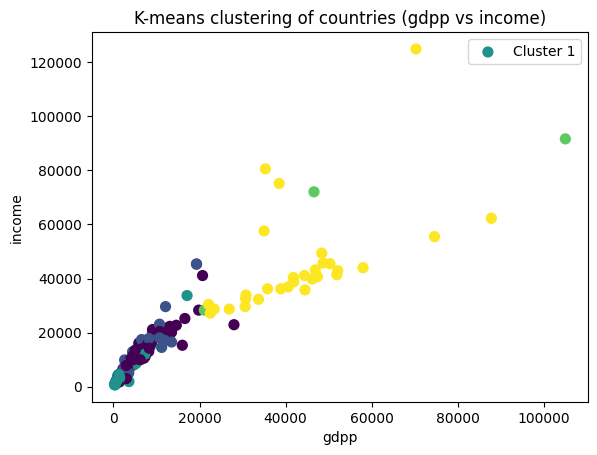

In [201]:
random_kmeans  =  KMeans(n_clusters=5)
random_kmeans.fit(country_data_scaled)
y_kmeans = random_kmeans.predict(country_data_scaled)
#plot it
plt.scatter(country_data['gdpp'], country_data['income'], c=y_kmeans, s=50, cmap='viridis')
plt.title('K-means clustering of countries (gdpp vs income)')
plt.xlabel('gdpp')
plt.ylabel('income')
plt.legend(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])
plt.show()

# 2.) Pick two features to visualize across

In [202]:
print("variables included in the dataset:")
country_data.columns

variables included in the dataset:


Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

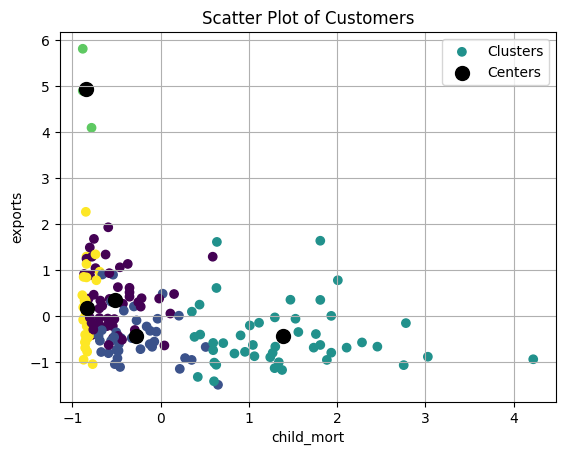

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [203]:
import matplotlib.pyplot as plt
#choose two variables to plot
x1_index = 0
x2_index = 1
X_scaled = country_data_scaled
X = country_data

scatter = plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=random_kmeans.labels_, cmap='viridis', label='Clusters')


centers = plt.scatter(random_kmeans.cluster_centers_[:, x1_index], random_kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100, label='Centers')

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')

# Generate legend
plt.legend()
plt.grid()
plt.show()
X.head()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means


Text(0.5, 0, 'Number of clusters')

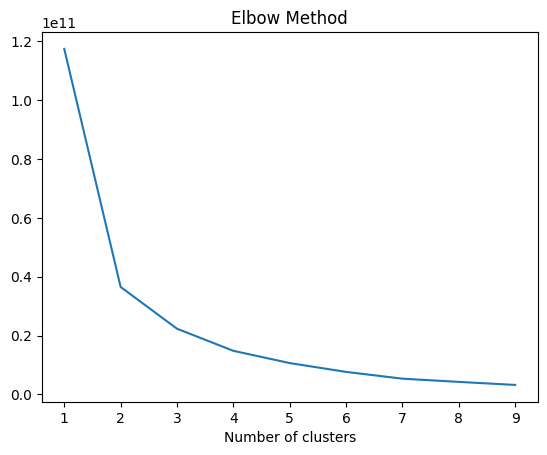

In [88]:
WCSS = []
max_k = 10
for i in range(1,max_k):
    kmeans = KMeans(n_clusters=i,  init='k-means++',n_init=10, max_iter=300, )
    kmeans.fit(country_data)
    WCSS.append(kmeans.inertia_)

plt.plot(range(1,max_k), WCSS)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')

In [2]:
#optional do in one

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

In [89]:
country_data.shape

(167, 9)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


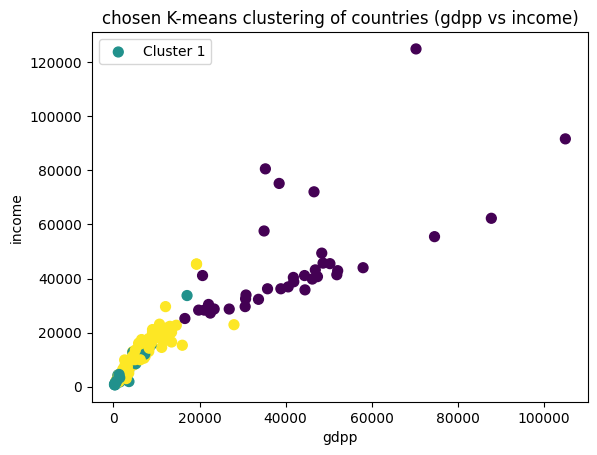

In [90]:
#choose a number of clusters
chosen_cluster = 3
chosen_kmeans =  KMeans(n_clusters=chosen_cluster)
chosen_kmeans.fit(country_data_scaled)
y_kmeans = chosen_kmeans.predict(country_data_scaled)
#plot it
plt.scatter(country_data['gdpp'], country_data['income'], c=y_kmeans, s=50, cmap='viridis')
plt.xlabel('gdpp')
plt.ylabel('income')
#name the three legend Cluster1 Cluster2 Cluster3
plt.legend(['Cluster 1', 'Cluster 2', 'Cluster 3'], loc='upper left')
plt.title('chosen K-means clustering of countries (gdpp vs income)')
plt.show()

/var/folders/_b/4lj1bh0s4473m5xx061k14lc0000gn/T/ipykernel_79301/3166249911.py:2: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(country_data['gdpp'][y_kmeans == i], country_data['income'][y_kmeans == i], s = 100, label = 'Cluster ' + str(i+1),c=np.random.rand(3,))


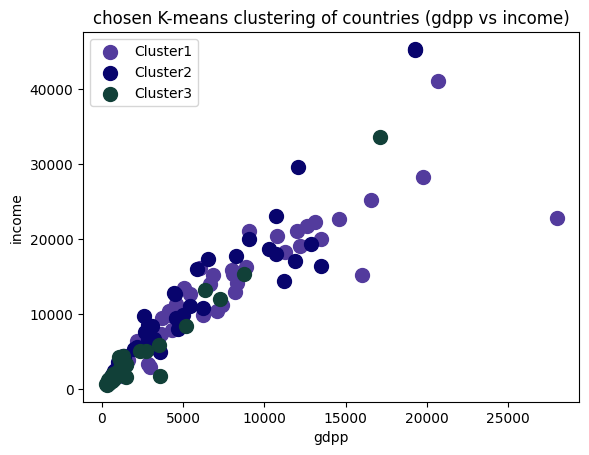

In [211]:
#这个图和上面一个意思，只是为了显示图例
for i in range(chosen_cluster):
    plt.scatter(country_data['gdpp'][y_kmeans == i], country_data['income'][y_kmeans == i], s = 100, label = 'Cluster ' + str(i+1),c=np.random.rand(3,))
plt.xlabel('gdpp')
plt.ylabel('income')
#name the three legend Cluster1 Cluster2 Cluster3
plt.legend(['Cluster'+str(i) for i in range(1,chosen_cluster+1)], loc='upper left')
plt.title('chosen K-means clustering of countries (gdpp vs income)')
plt.show()  
    

# 6.) Do the same for a silhoutte plot

In [213]:
from sklearn.metrics import silhouette_score
print("silhouette score for the chosen kmeans:")
silhouette_score(country_data_scaled, chosen_kmeans.labels_)

silhouette score for the chosen kmeans:


0.28329575683463126

# 7.) Create a list of the countries that are in each cluster. Write interesting things you notice.

In [214]:
#这部分只是为了让country list变成一个dataframe，漂亮一点
#没啥用，可以忽略
def transform_for_pretty_dataframe(x,n):
    
    
    x_dict = {}
    row_length = len(x)//n+1
    for i in range(n):
        if i < n-1:
            x_dict['Col'+str(i+1)] = x[i*row_length:(i+1)*row_length]
        else:
            t = np.concatenate([x[i*row_length:],np.array([0]*(row_length-len(x[i*row_length:])))])
            x_dict['Col'+str(i+1)] = t
            
                   
        
        
                
   #transform x_dict into a dataframe
   
    return pd.DataFrame(x_dict)

In [215]:
chosen_kmeans = KMeans(n_clusters=chosen_cluster,n_init=30)
chosen_kmeans.fit(country_data_scaled)
pred  = pd.DataFrame(chosen_kmeans.labels_)
pred.columns = ['Cluster']
print("Final result of clustering:\n\n\n")
print("dataset cnoncatenated with cluster number:")
print(pd.concat([country_data, pred], axis = 1))
print("List of countries in each cluster:")
for i in range(0,chosen_cluster):
    print("Cluster ", i, ":\n ",transform_for_pretty_dataframe(country_var[kmeans.labels_ == i].values, 2))
    #如果你不喜欢这种规整的输出，可以用下面这个
    #print("Cluster ", i, ":\n ",country_var[kmeans.labels_ == i].values)
    print("\n\n")


Final result of clustering:



dataset cnoncatenated with cluster number:
     child_mort  exports  health  imports  income  inflation  life_expec  \
0          90.2     10.0    7.58     44.9    1610       9.44        56.2   
1          16.6     28.0    6.55     48.6    9930       4.49        76.3   
2          27.3     38.4    4.17     31.4   12900      16.10        76.5   
3         119.0     62.3    2.85     42.9    5900      22.40        60.1   
4          10.3     45.5    6.03     58.9   19100       1.44        76.8   
..          ...      ...     ...      ...     ...        ...         ...   
162        29.2     46.6    5.25     52.7    2950       2.62        63.0   
163        17.1     28.5    4.91     17.6   16500      45.90        75.4   
164        23.3     72.0    6.84     80.2    4490      12.10        73.1   
165        56.3     30.0    5.18     34.4    4480      23.60        67.5   
166        83.1     37.0    5.89     30.9    3280      14.00        52.0   

     total_fe

In [ ]:
#### Write an observation

## 8.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [216]:
print("Descriptive statistics of the dataset:")
country_data.describe()
print("derscriptive statistics of the dataset by cluster:")
for i in range(0,chosen_cluster):
    #non scaled values so country_data instead of country_data_scaled
    print("Cluster ", i, ":\n ",country_data[kmeans.labels_ == i].describe())
    print("\n\n")

Descriptive statistics of the dataset:
derscriptive statistics of the dataset by cluster:
Cluster  0 :
         child_mort    exports     health     imports        income  inflation  \
count   84.000000  84.000000  84.000000   84.000000     84.000000  84.000000   
mean    21.927381  40.243917   6.200952   47.473404  12305.595238   7.600905   
std     13.757919  19.029182   2.167233   20.103873   8180.073696   7.849516   
min      4.500000   0.109000   1.970000    0.065900   1780.000000  -4.210000   
25%     11.650000  26.750000   4.855000   32.150000   6635.000000   2.367500   
50%     18.350000  37.300000   5.930000   48.650000  10180.000000   5.805000   
75%     28.350000  51.400000   7.362500   60.425000  16650.000000  10.025000   
max     64.400000  93.800000  14.200000  108.000000  45400.000000  45.900000   

       life_expec  total_fer          gdpp  
count   84.000000  84.000000     84.000000  
mean    72.814286   2.307500   6486.452381  
std      3.960745   0.696957   5021.434

[Text(1, 0, 'cluster0'), Text(2, 0, 'cluster1'), Text(3, 0, 'cluster2')]

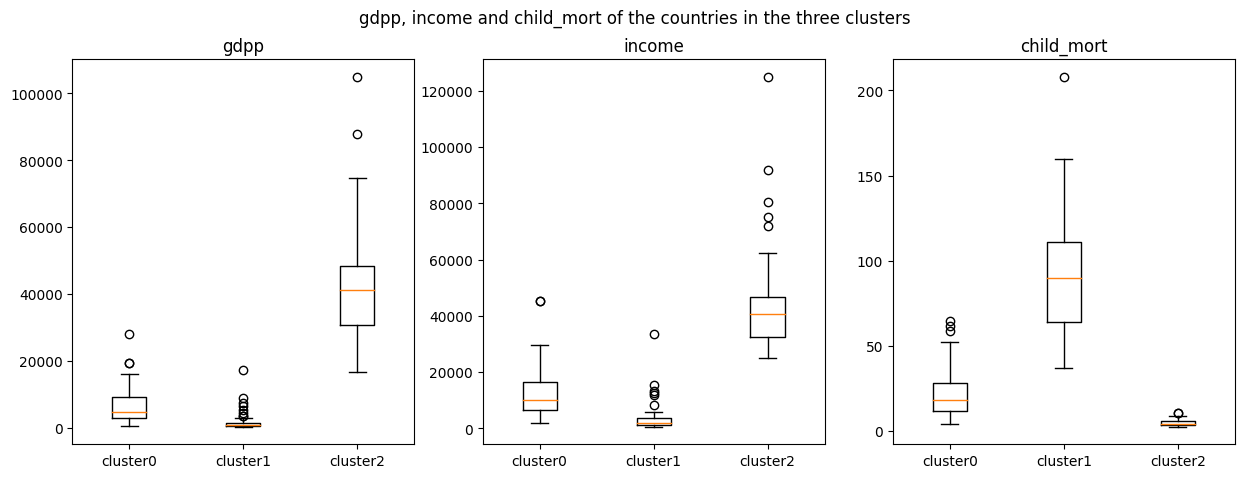

In [217]:
#plot the gdp, income and child mortality of the countries
chosen_variables = ['gdpp', 'income', 'child_mort']
#in the three clusters
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("{0}, {1} and {2} of the countries in the three clusters".format(chosen_variables[0], chosen_variables[1], chosen_variables[2]))
#fig.suptitle('GDP, income and child mortality of the countries in the three clusters')
#plot gdp
axs[0].boxplot([country_data[chosen_variables[0]][kmeans.labels_ == 0], country_data['gdpp'][kmeans.labels_ == 1], country_data['gdpp'][kmeans.labels_ == 2]])
axs[0].set_title(chosen_variables[0])
axs[0].set_xticklabels(['cluster'+str(i) for i in range(0,chosen_cluster)])

#plot inflation
axs[1].boxplot([country_data[chosen_variables[1]][kmeans.labels_ == 0], country_data['income'][kmeans.labels_ == 1], country_data['income'][kmeans.labels_ == 2]])
axs[1].set_title(chosen_variables[1])
axs[1].set_xticklabels(['cluster'+str(i) for i in range(0,chosen_cluster)])

#plot child mortality
axs[2].boxplot([country_data[chosen_variables[2]][kmeans.labels_ == 0], country_data['child_mort'][kmeans.labels_ == 1], country_data['child_mort'][kmeans.labels_ == 2]])
axs[2].set_title(chosen_variables[2])
axs[2].set_xticklabels(['cluster'+str(i) for i in range(0,chosen_cluster)])





# 9.) Write an observation about the descriptive statistics.

### Conclusions from clustering the dataset
>It is shown in the table that the immortality rate and income and gdp growth of different clustering groups are quite different showing. The country with
higher immortality rate and lower income and gdp growth are more likely to be in the same clustering group. The clustering result is quite reasonable.
that indicates the clustering result is quite reasonable and corresponding to the conclusions from development economics as 
countries with lower income and gdp growth are more likely to have higher immortality rate for children due to the lack of medical resources and poor living conditions.

A paper with reputation (Albouy, David Y. “The Colonial Origins of Comparative Development: An Empirical Investigation: Comment.” The American Economic Review, vol. 102, no. 6, 2012, pp. 3059–76. JSTOR, http://www.jstor.org/stable/41724681. Accessed 7 Mar. 2024.) has linked the relationship between institutional foundation and long-term development in gdp and income growth. It seems that the colonial situation largely decide the pattern of economic growth and the level of infrastructure and general public services with medical care included.